# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 19 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту называйте файл и тему письма в следующем виде:<br\>
** [minor-da-16]*{Фамилия}*_hw*{Номер ДЗ}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [87]:
import scipy as sp
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [179]:
n=500
print('посчитаем все для гауссовского распределения:')
norm =  stats.norm.rvs(1, 2, size=n)
print('среднее равно',np.mean(norm))
print('дисперсия равна',(sp.stats.tstd(norm))**2)
print('кривизна равна',stats.kurtosis(norm))
print('смещенность равна',stats.skew(norm))
print('минимум равен',np.min(norm))
print('максимум равен',np.max(norm))

посчитаем все для гауссовского распределения:
среднее равно 0.847960408789
дисперсия равна 3.75588903759
кривизна равна -0.15070399438094384
смещенность равна 0.008657491620085913
минимум равен -5.23425084084
максимум равен 6.70565949508


In [175]:
print('посчитаем все для хи-квадрат распределения:')
chisq =  stats.chi2.rvs(3, size=n)
print('среднее равно',np.mean(chisq))
print('дисперсия равна',(sp.stats.tstd(chisq))**2)
print('кривизна равна',stats.kurtosis(chisq))
print('смещенность равна',stats.skew(chisq))
print('минимум равен',np.min(chisq))
print('максимум равен',np.max(chisq))

посчитаем все для хи-квадрат распределения:
среднее равно 3.06491871499
дисперсия равна 6.16220935681
кривизна равна 3.150629831179418
смещенность равна 1.5134844151881959
минимум равен 0.0604233423129
максимум равен 17.0352827127


In [174]:
print('посчитаем все для пуассоновского распределения:')
poiss=stats.poisson.rvs(10, size=n)
print('среднее равно',np.mean(poiss))
print('дисперсия равна',(sp.stats.tstd(poiss))**2)
print('кривизна равна',stats.kurtosis(poiss))
print('смещенность равна',stats.skew(poiss))
print('минимум равен',np.min(poiss))
print('максимум равен',np.max(poiss))

посчитаем все для пуассоновского распределения:
среднее равно 10.006
дисперсия равна 9.92982364729
кривизна равна -0.3913248917900427
смещенность равна 0.13448940631433293
минимум равен 2
максимум равен 19


**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

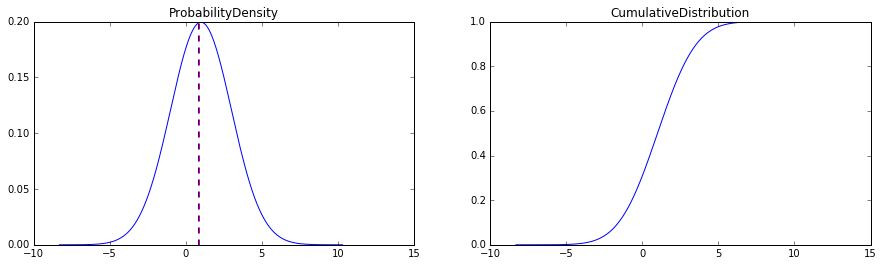

In [196]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,4)

x = np.linspace(stats.norm.ppf(0.01, 1, 4), stats.norm.ppf(0.99, 1, 4), 500)
#Нормальное (гауссовское)
pdfnorm = stats.norm.pdf(x,1,2)
cdfnorm = stats.norm.cdf(x,1,2)
ax[0].axvline(np.mean(norm), color='r', linestyle='--')
ax[0].axvline(np.median(norm), color='b', linestyle='--')
ax[0].plot(x, pdfnorm)
ax[1].plot(x, cdfnorm)
ax[0].set_title('ProbabilityDensity')
ax[1].set_title('CumulativeDistribution')

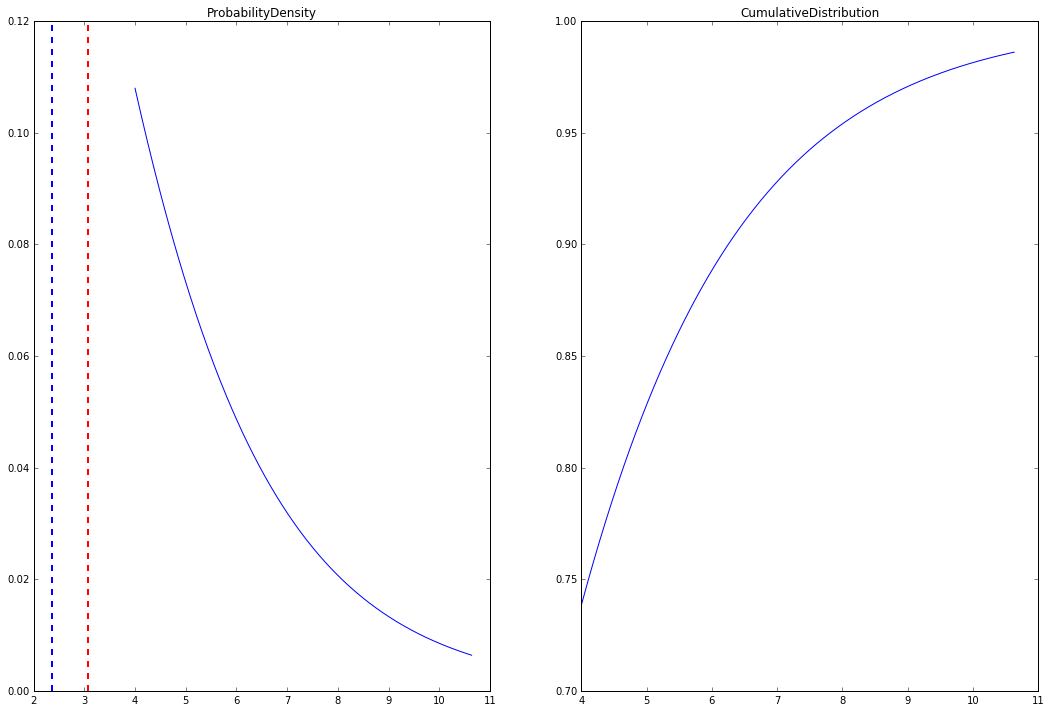

In [198]:
fig, bx = plt.subplots(1,2)
fig.set_size_inches(18,12)
#Хи-квадрат
x2 = np.linspace(stats.chi2.ppf(0.01, 1, 4), stats.chi2.ppf(0.99, 1, 4), 500)
pdfchi = stats.chi2.pdf(x2, 3)
cdfchi = stats.chi2.cdf(x2, 3)
bx[0].axvline(np.mean(chisq), color='r', linestyle='--', lw=2)
bx[0].axvline(np.median(chisq), color='b', linestyle='--', lw=2)
bx[0].plot(x2, pdfchi)
bx[1].plot(x2, cdfchi)
bx[0].set_title('ProbabilityDensity')
bx[1].set_title('CumulativeDistribution')

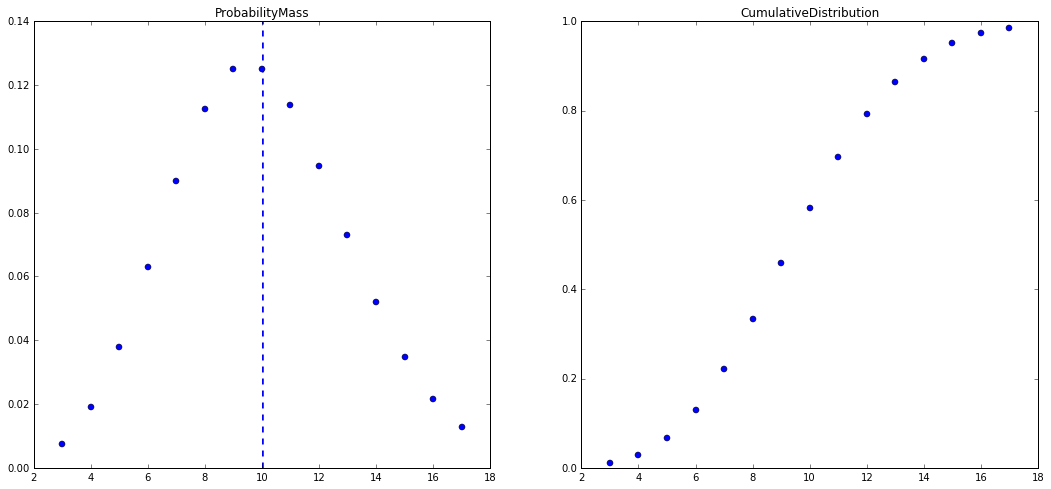

In [201]:
fig, dx = plt.subplots(1,2)
fig.set_size_inches(18,8)
#Пуассоновское
x3 = np.arange(stats.poisson.ppf(0.01, 10), stats.poisson.ppf(0.99, 10))
poisson = stats.poisson.rvs(10, size=500)


pmfpois = stats.poisson.pmf(x3, 10) 
cdfpois = stats.poisson.cdf(x3, 10) 
dx[0].axvline(np.mean(poisson), color='r', linestyle='--') 
dx[0].axvline(np.median(poisson), color='b', linestyle='--') 
dx[0].plot(x3, pmfpois , 'bo') 
dx[1].plot(x3, cdfpois, 'bo') 
dx[0].set_title('ProbabilityMass') 
dx[1].set_title('CumulativeDistribution')

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [96]:
print('Статистика по гауссовскому распределению:')
print(sp.stats.describe(norm))

Статистика по гауссовскому распределению:
DescribeResult(nobs=500, minmax=(-5.3649602404607721, 5.8934652516665818), mean=0.99917213872211708, variance=4.2283394875939919, skewness=-0.15255879108319884, kurtosis=-0.22988910169021937)


In [98]:
print('Статистика по пуассоновскому распределению:')
print(sp.stats.describe(poiss))

Статистика по пуассоновскому распределению:
DescribeResult(nobs=500, minmax=(2, 21), mean=9.9640000000000004, variance=9.2251543086172347, skewness=0.3848284474947218, kurtosis=0.24796392192189787)


In [97]:
print('Статистика по хи-квадрат распределению:')
print(sp.stats.describe(chisq))

Статистика по хи-квадрат распределению:
DescribeResult(nobs=500, minmax=(0.011635130948934699, 13.021652219043792), mean=2.9545871050617385, variance=5.259926917448575, skewness=1.3533072927962437, kurtosis=2.1914128272736457)


## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

In [ ]:
Коэффициент корреляции Пирсона измеряет линейную взаимосвязь двух величин, тогда как
коэффициент корреляции Спирмана используется для измерения взаимосвязи двух величин, изменяющихся
взаимозависимо, но необязятельно с постоянным темпом. При этом Спирман используется для измерения
корреляции порядковых переменных. При почти линейной зависимости положительной коэффициент Пирсона 
будет точнее оценивать корреляцию, в то время как по Спирману корреляция будет оценена как 1. 

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [367]:
data = pd.read_csv('beauty.csv', sep=';')
c=data.corr(method='pearson', min_periods=1)
table = c.mask(np.triu(np.ones(c.shape)).astype(np.bool))


p = pd.DataFrame(table.stack())
p.columns = ['correlation']
p['abs']= p['correlation'].abs()
p = p.sort_values(by='abs', ascending=False)
p.drop('abs', axis=1, inplace=True)

print(p[:3])


                 correlation
married female     -0.319228
female  wage       -0.313419
educ    service     0.301628


In [202]:
data = pd.read_csv('beauty.csv',sep=';')

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

хи-квадрат распределение с параметрами: (5.7818995163937998, 0, 1.0907596299313234)


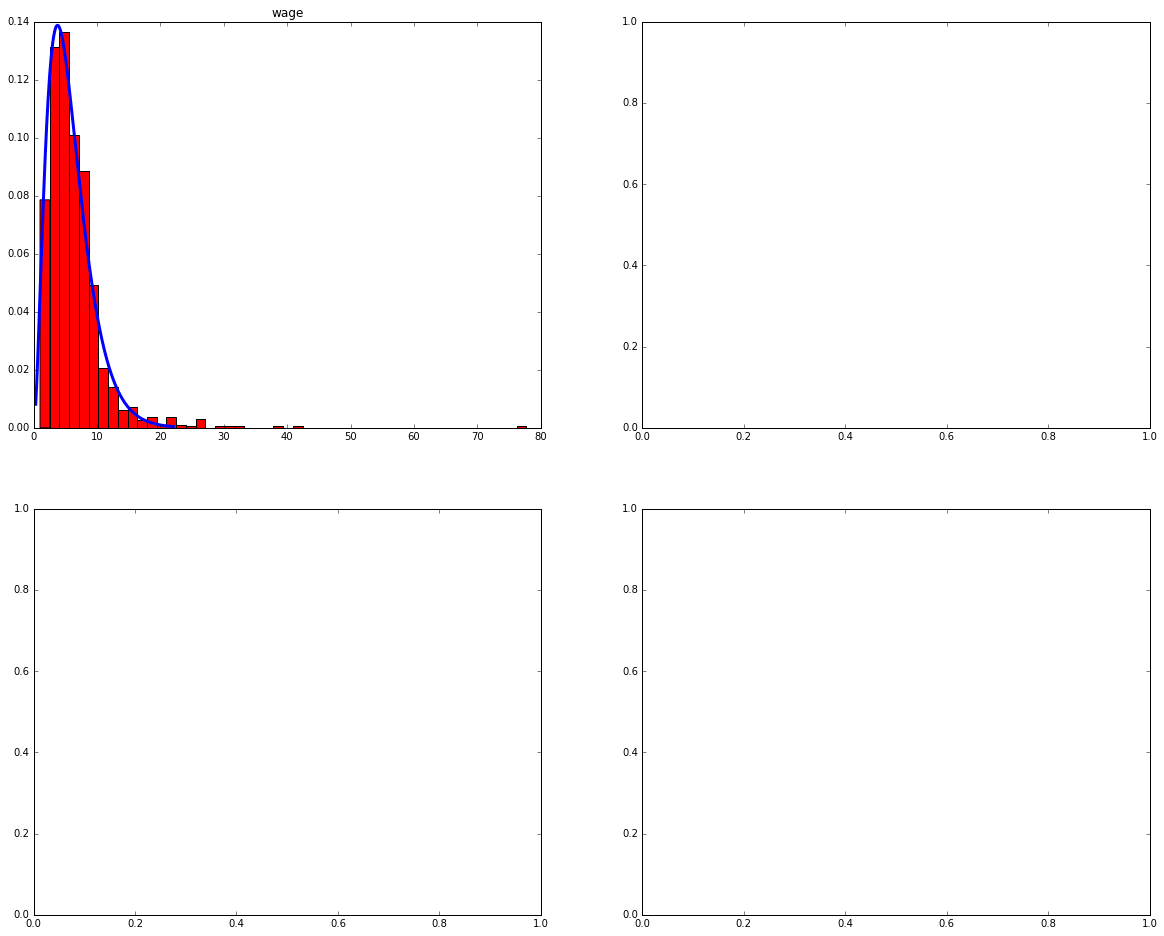

In [370]:
par = stats.chi2.fit(data['wage'], floc=0)
print('хи-квадрат распределение с параметрами:',par)
inter = np.linspace(stats.chi2.ppf(0.001, par[0], par[1]), stats.chi2.ppf(0.999, par[0], par[1]), 300)
fig, qx = plt.subplots(2,2)
fig.set_size_inches(20,16)
qx[0,0].hist(data['wage'], normed=True, color='r',bins=50)
qx[0,0].plot(inter, stats.chi2.pdf(inter, a1[0], a1[1]),lw=3)
qx[0,0].set_title('wage')





экспоненциальное распределение с параметрами: (5.7818995163937998, 0, 1.0907596299313234)


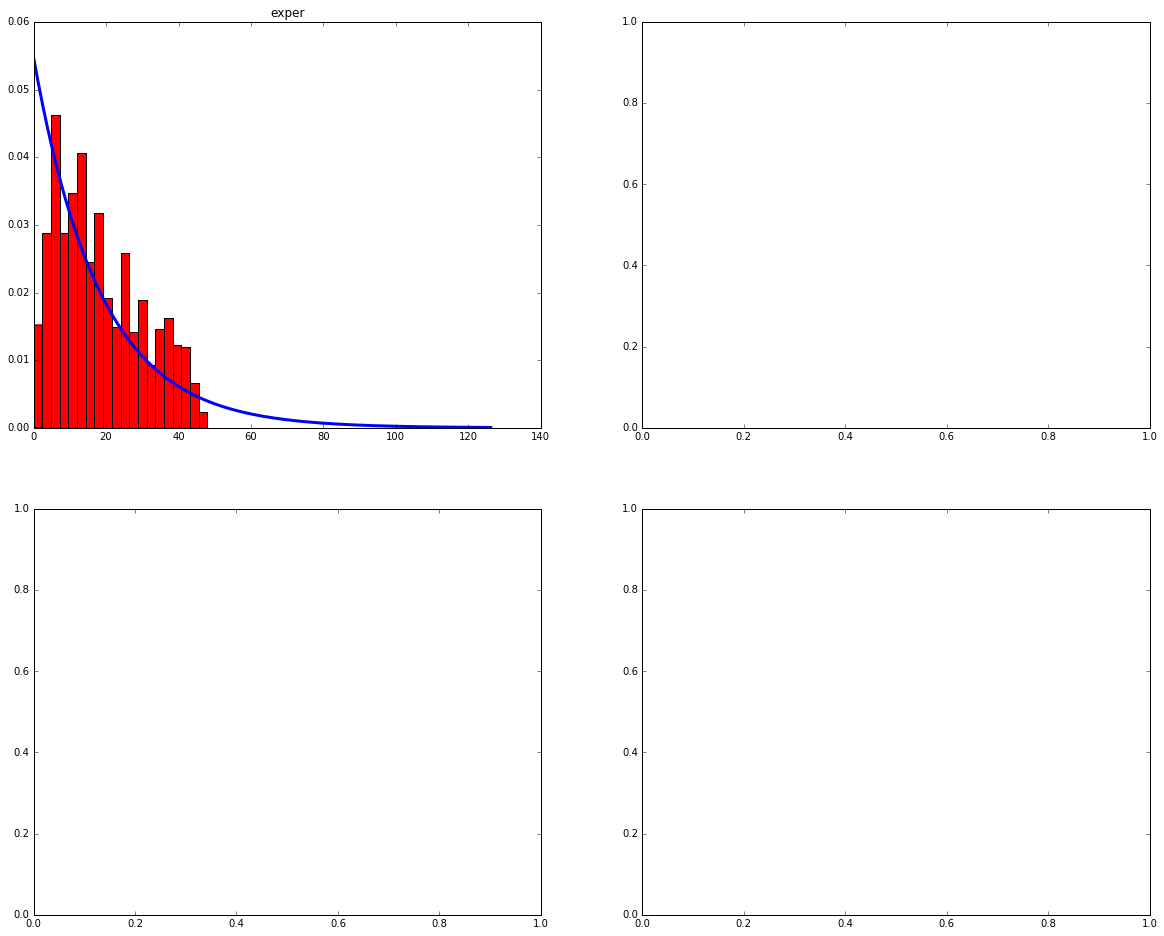

In [342]:
par1 = stats.expon.fit(data['exper'], floc=0)
print('экспоненциальное распределение с параметрами:',par)
inter = np.linspace(stats.expon.ppf(0.001, par1[0], par1[1]), stats.expon.ppf(0.999, par1[0], par1[1]), 300)
fig, qx = plt.subplots(2,2)
fig.set_size_inches(20,16)
qx[0,0].hist(data['exper'], normed=True, color='r',bins=20)
qx[0,0].plot(inter, stats.expon.pdf(inter, par1[0], par1[1]),lw=3)
qx[0,0].set_title('exper')

In [ ]:
Все нижеследующие признаки, значения которых распределены по Бернулли, можно оценить методом максимальног 
правдоподобия, посчитав кол-во значений 1(вероятность которого p) и 0(вероятность которого 1-p), перемножив
вероятности для каждой величины, мы бы получили вероятность получения значений нашей выборки (т.к. мы предполагаем,
что события независимы). Промаксимизировав полученное произведение по p, мы бы получили оценку методом ML.                                                                                             

(array([ 917.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  343.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

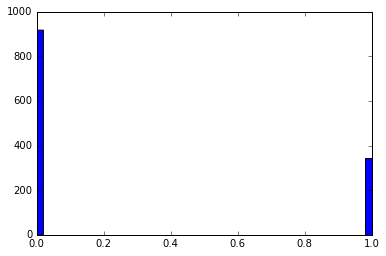

In [351]:
plt.hist(data['union'],bins=50) #распределена по Бернулли

(array([   84.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1176.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

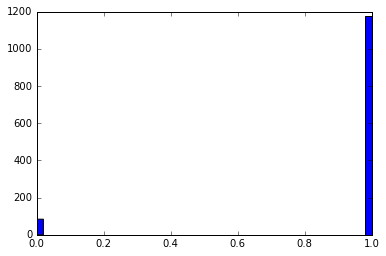

In [124]:
plt.hist(data['goodhlth'],bins=50) #распределена по Бернулли

(array([ 1167.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    93.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

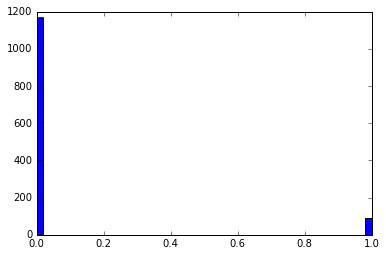

In [125]:
plt.hist(data['black'],bins=50) #распределена по Бернулли

(array([ 824.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  436.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

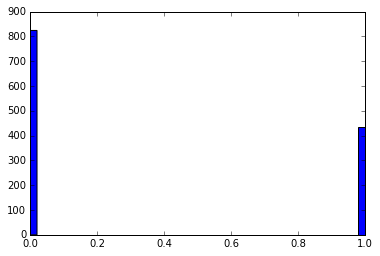

In [126]:
plt.hist(data['female'],bins=50) #распределена по Бернулли

(array([ 389.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  871.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

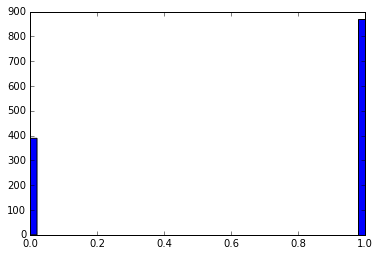

In [352]:
plt.hist(data['married'],bins=50) #распределена по Бернулли

(array([ 915.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  345.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

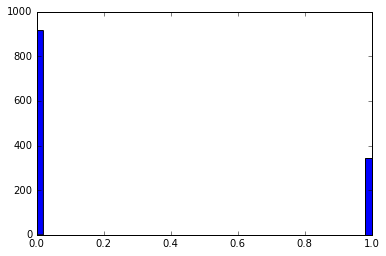

In [128]:
plt.hist(data['service'],bins=50) #распределена по Бернулли

экспоненциальное распределение с параметрами: (0, 12.563476562500025)


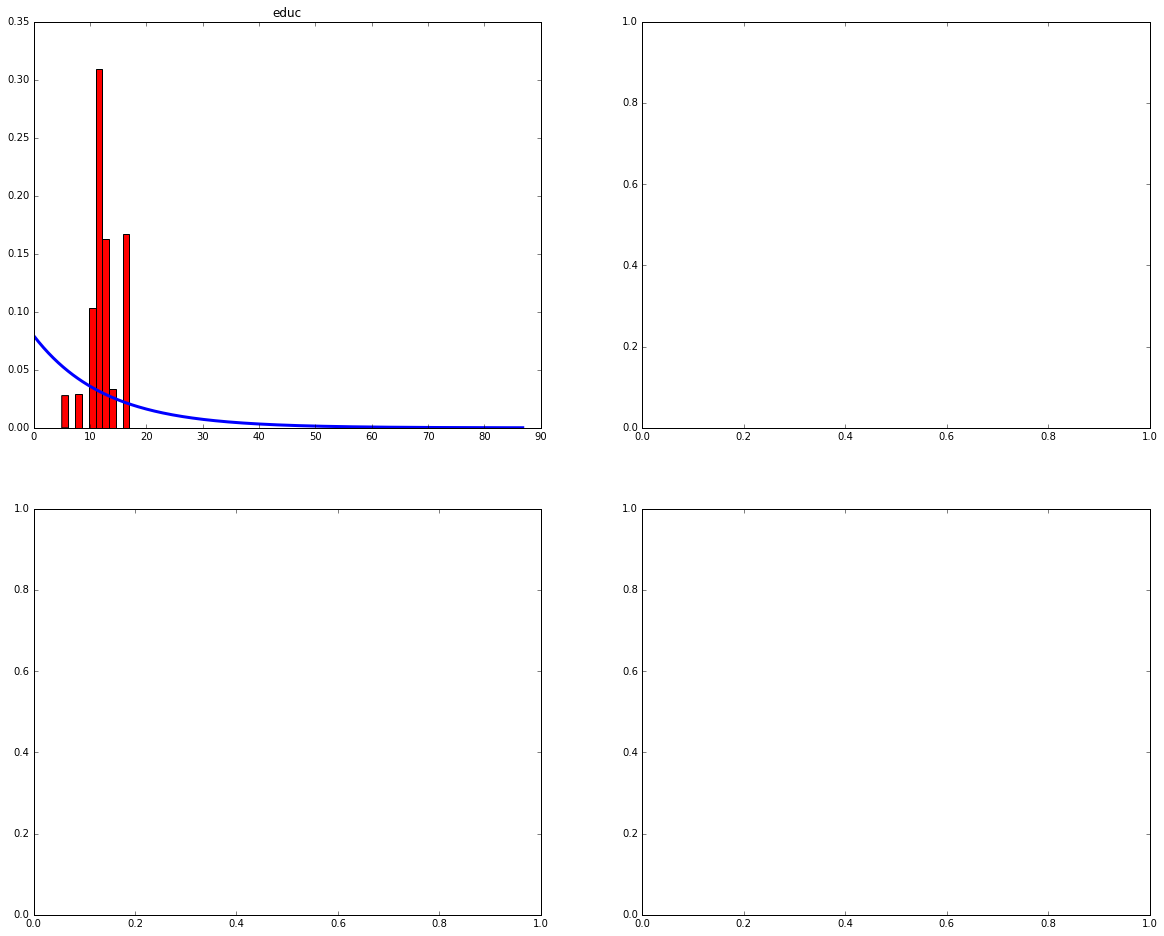

In [349]:
par = stats.expon.fit(data['educ'], floc=0)
print('экспоненциальное распределение с параметрами:',par)
inter = np.linspace(stats.expon.ppf(0.001, par[0], par[1]), stats.expon.ppf(0.999, par[0], par[1]), 300)
fig, qx = plt.subplots(2,2)
fig.set_size_inches(20,16)
qx[0,0].hist(data['educ'], normed=True, color='r',bins=10)
qx[0,0].plot(inter, stats.expon.pdf(inter, par[0], par[1]),lw=3)
qx[0,0].set_title('educ')

(array([  13.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  142.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  722.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  364.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   19.]),
 array([ 1.  ,  1.08,  1.16,  1.24,  1.32,  1.4 ,  1.48,  1.56,  1.64,
         1.72,  1.8 ,  1.88,  1.96,  2.04,  2.12,  2.2 ,  2.28,  2.36,
         2.44,  2.52,  2.6 ,  2.68,  2.76,  2.84,  2.92,  3.  ,  3.08,
         3.16,  3.24,  3.32,  3.4 ,  3.48,  3.56,  3.64,  3.72,  3.8 ,
         3.88,  3.96,  4.04,  4.12,  4.2 ,  4.28,  4.36,  4.44,  4.52,
         4.6 ,  4.68,  4.76,  4.84,  4.92,  5.  ]),
 <a list of 50 Patch objects>)

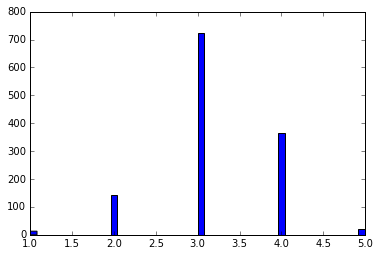

In [130]:
plt.hist(data['looks'],bins=50)

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [260]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [262]:
categories = ['sci.electronics', 'sci.med']
text = fetch_20newsgroups(subset='all', categories=categories)
text_all = text.data
text_train, text_test, y_train, y_test = train_test_split(text.data, text.target, test_size = 0.3)


**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [368]:
text = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
text.fit(text_all)
X_train = text.transform(text_train)
X_test  = text.transform(text_test)

**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [364]:
tab=pd.DataFrame({'Number of entries':np.sum(X_train, axis=0), 'word':text.get_feature_names()})
tab.sort_values(by='Number of entries', ascending=False)[:50]

,Number of entries,word
10795,2634,edu
26047,1472,subject
17036,1464,lines
7991,1400,com
20172,1387,organization
4915,912,article
29587,912,writes
28162,693,university
28343,687,use
16987,654,like


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [365]:
clf = MultinomialNB(alpha=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
np.mean(predicted == y_test)  

0.9797639123102867

**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [366]:
clf = MultinomialNB(alpha=0).fit(X_train, y_train)
predicted = clf.predict(X_test)
np.mean(predicted == y_test) 

0.55311973018549743

In [ ]:
Да, т.к. при alpha=0 вероятность появления какого-то слова в тексте подразумевается нулевая,если оно не встречалось в выборке,
т.е. вероятность наступления совокупности событий (появления слов) так же равнялась 0 (т.е. их произведение), т.к. 
события считаются независимыми.
Теперь при alpha=1 вероятность каждого из событий предполагается ненулевая (возможно, что слово из текста
не было включено в выборку), ведь мы добавляем к частоте появления единицу, что повышает точность совпадения.
